# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import random

# Setting fixed random seeds for libraries to reduce randomness.
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values
    shear_range=0.2,           # Random shear transformations
    zoom_range=0.2,            # Random zoom
    horizontal_flip=True       # Random flips
)

training_set = train_datagen.flow_from_directory(
    'dataset/training_set',
    target_size=(64, 64),      # Resize all images to 64x64
    batch_size=32,
    class_mode='binary'        # binary: only two classes: cat or dog
)

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(
    'dataset/test_set',
    target_size=(64, 64),
    batch_size=25,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [7]:
cnn = keras.Sequential()

### Step 1 - Convolution

In [9]:
cnn.add(keras.layers.Input(shape=(64,64,3)))
cnn.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

### Step 2 - Pooling

In [11]:
cnn.add(keras.layers.MaxPooling2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [13]:
cnn.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(keras.layers.MaxPooling2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [15]:
cnn.add(keras.layers.Flatten())

### Step 4 - Full Connection

In [17]:
cnn.add(keras.layers.Dense(units=128, activation='relu'))

# Dropout layer to reduce overfitting
cnn.add(keras.layers.Dropout(0.5))

### Step 5 - Output Layer

In [19]:
# If output is near 1, predict "dog"
# If output is near 0, predict "cat"
cnn.add(keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [21]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [23]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',   # Metric to monitor (e.g., validation loss)
    patience=3,           # Number of epochs to wait for improvement
    restore_best_weights=True  # Restore the weights of the best epoch
)

# Training
history = cnn.fit(
    x=training_set,
    validation_data=test_set,
    epochs=50,  # Maximum number of epochs
    callbacks=[early_stopping]  # Use EarlyStopping callback
)

# Evaluating on the Test set
test_loss, test_accuracy = cnn.evaluate(test_set)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Save the Model
cnn.save('my_model.keras')

Epoch 1/50


/opt/homebrew/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5149 - loss: 0.6915

/opt/homebrew/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - accuracy: 0.5150 - loss: 0.6915 - val_accuracy: 0.6305 - val_loss: 0.6576
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 70ms/step - accuracy: 0.6094 - loss: 0.6564 - val_accuracy: 0.5920 - val_loss: 0.6612
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 73ms/step - accuracy: 0.6732 - loss: 0.6094 - val_accuracy: 0.6810 - val_loss: 0.5967
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.6806 - loss: 0.5991 - val_accuracy: 0.6530 - val_loss: 0.6197
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.7036 - loss: 0.5786 - val_accuracy: 0.6740 - val_loss: 0.5959
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.7069 - loss: 0.5698 - val_accuracy: 0.6720 - val_loss: 0.5955
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 70ms/step - accuracy: 0.7206 - loss: 0.5506 - val_accuracy: 0.7180 - val_loss: 0.5470
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 73ms/step - accuracy: 0.7245 - loss: 0.5409 - val_accurac

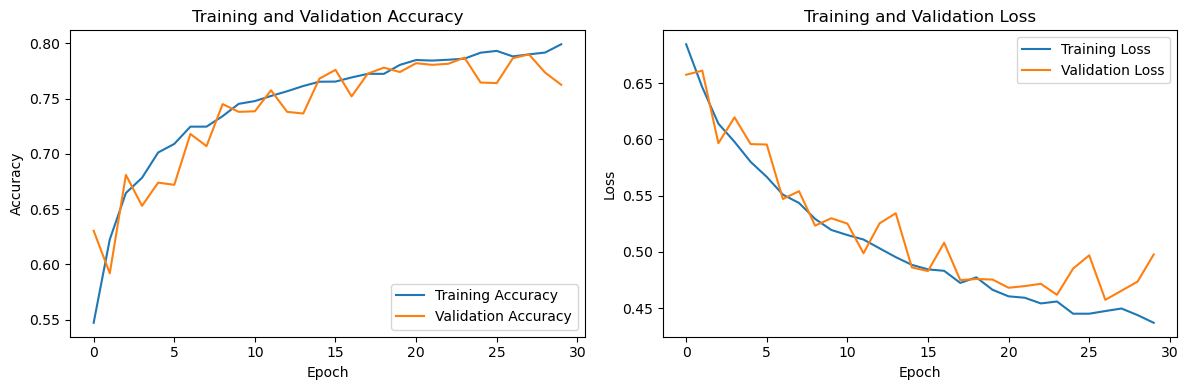

In [24]:
# Function to visualize training history
def plot_training_history(history):
    # Retrieve a dictionary of metrics stored by history
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Determine the number of epochs
    epochs_range = range(len(acc))
    
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    
    # Accuracy subplot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    
    # Loss subplot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()

plot_training_history(history)

## Part 4 - Making a single prediction

In [25]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

In [26]:
# Load the Model
loaded_model = load_model('my_model.keras')

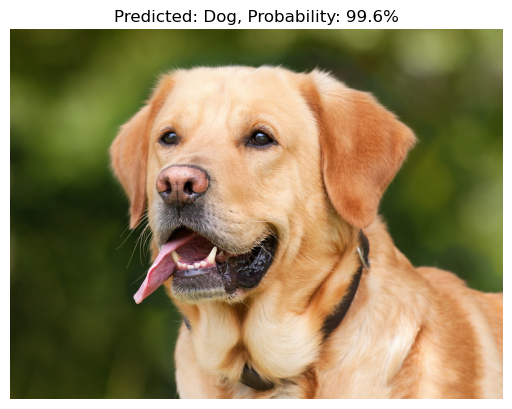

Prediction: Dog, Probability: 99.6%


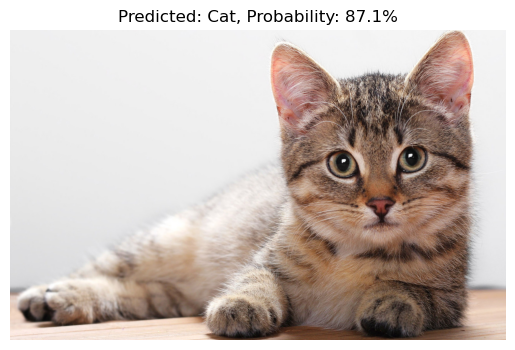

Prediction: Cat, Probability: 87.1%


In [27]:
# Function to Predict an image
def predict_image(imageFile):
    test_image = image.load_img(imageFile, target_size=(64, 64))
    test_image_array = image.img_to_array(test_image)
    test_image_array = np.expand_dims(test_image_array, axis=0)  # Add batch dimension
    test_image_array = test_image_array / 255.0  # Rescale just like our training data

    result = loaded_model.predict(test_image_array, verbose=0)

    score = result[0][0]

    # Determine predicted class
    if score > 0.5:
        prediction = 'Dog' # If output is near 1, predict "dog"
    else:
        prediction = 'Cat' # If output is near 0, predict "cat"
        score = 1 - score
    
    # Display the image
    plt.imshow(image.load_img(imageFile))
    plt.axis('off')
    plt.title(f"Predicted: {prediction}, Probability: {score:.1%}")
    plt.show()
    
    # Print details
    print(f"Prediction: {prediction}, Probability: {score:.1%}")

predict_image('dataset/single_prediction/cat_or_dog_1.jpg')
predict_image('dataset/single_prediction/cat_or_dog_2.jpg')